<a href="https://colab.research.google.com/github/Kazantsev-Alexey/ML_DS/blob/main/%22%D0%91%D0%BE%D0%BB%D1%8C%D1%88%D0%BE%D0%B5_%D0%94%D0%97_2_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 style="text-align: center;"><b>Большое домашнее задание 2. Участие в соревнованиях на Kaggle. Работа с нерепрезентативными данными.
</b></h2>

ДЗ в колабе: https://colab.research.google.com/drive/18Hi97eESCrXYht-7SIoj_19pwcZhl17Y?usp=sharing

В этом домашнем задании нам нужно применить в реальном соревновании накопленные знания по машинному обучению и анализу данных!

- Нужно будет провести предобработку [данных с Kaggle](https://www.kaggle.com/sid321axn/thoraric-surgery). Затем нужно будет предсказать колонку DGN (диагноз). Это задача классификации. 
- Описание датасета (что значит признаки): https://archive.ics.uci.edu/ml/datasets/Thoracic+Surgery+Data 
- Не забудьте провести анализ данных перед тем, как применять ML-модели! Вам нужно сначала понять, с чем Вы имеете дело, поискать зависимости в данных, понять природу этих зависимостей, и только после этого уже подбирать алгоритмы. Данные с подвохом! Внимательно смотрите на распределения признаков в каждом из классов!
- В качестве основы можно использовать наработки с занятий. Необходимо попробовать сделать аугментацию данных, т.к. данных очень мало, для обучения содержательных моделей их не хватит.
- Попробуйте kNN, логистическую регрессию, SVM. Поэкспериментируйте с добавлением композитных признаков (например, полиномиальных), выбором ядра (для SVM). Подберите гиперпараметры по кросс-валидации (GridSearchCV или RandomSearchCV, второй вариант предпочтительнее).  
- Достичь идеального качества Вам не удастся, да и гнаться за этим не стоит. Гораздо важнее провести вдумчивый анализ и показать, что Вы разобрались в теме.

**Правила:**

- **Дедлайн один:** 29 января 23:59. Решения, отправленные позже, проверяться не будут, кроме случаев наличия уважительной причины.



Решения, размещенные на каких-либо интернет-ресурсах, не принимаются.
 При написании кода придерживайтесь `pep8` и используйте `type hints`.

**После жесткого дедлайна задания не принимаются. Так как дальше будет работа только над проектом**

# Анализ данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Kazantsev-Alexey/ML_DS/main/kaggledata.csv', index_col='id')

In [3]:
df.head()

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
id,,,,,,,,,,,,,,,,,
1,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
2,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
3,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
4,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
5,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T


In [4]:
df.describe()

,PRE4,PRE5,AGE
count,470.000000,470.000000,470.000000
mean,3.281638,4.568702,62.534043
std,0.871395,11.767857,8.706902
min,1.440000,0.960000,21.000000
25%,2.600000,1.960000,57.000000
50%,3.160000,2.400000,62.000000
75%,3.807500,3.080000,69.000000
max,6.300000,86.300000,87.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 470 entries, 1 to 470
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DGN      470 non-null    object 
 1   PRE4     470 non-null    float64
 2   PRE5     470 non-null    float64
 3   PRE6     470 non-null    object 
 4   PRE7     470 non-null    object 
 5   PRE8     470 non-null    object 
 6   PRE9     470 non-null    object 
 7   PRE10    470 non-null    object 
 8   PRE11    470 non-null    object 
 9   PRE14    470 non-null    object 
 10  PRE17    470 non-null    object 
 11  PRE19    470 non-null    object 
 12  PRE25    470 non-null    object 
 13  PRE30    470 non-null    object 
 14  PRE32    470 non-null    object 
 15  AGE      470 non-null    int64  
 16  Risk1Yr  470 non-null    object 
dtypes: float64(2), int64(1), object(14)
memory usage: 66.1+ KB


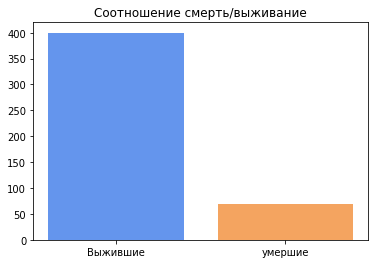

In [6]:
false = (df['Risk1Yr']=="F").sum()
true = (df['Risk1Yr']=='T').sum()
x = ['Выжившие', 'умершие']
y = [false, true]
fig, ax = plt.subplots()
ax.bar(x, y, color=('cornflowerblue', 'sandybrown' ))
plt.title('Соотношение смерть/выживание')
plt.show()


In [7]:
y = []   # type: List[int] 
for i in (df['Risk1Yr']):
  if i == 'F':
   y.append(0)
  else:
    y.append(1)
y = np.array(y)

In [8]:
from sklearn import preprocessing as p

def encoder(df):
    df_copy = df.copy() 
    enc_dict = {}
    for i in df_copy.columns:
        if df_copy.dtypes[i] == np.object:
            enc_dict[i] = p.LabelEncoder()
            df_copy[i] = enc_dict[i].fit_transform(df_copy[i]) 
    return df_copy, enc_dict

coded_df, encoders = encoder(df) 
coded_df.head() 

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
id,,,,,,,,,,,,,,,,,
1,1,2.88,2.16,1,0,0,0,1,1,3,0,0,0,1,0,60,0
2,2,3.40,1.88,0,0,0,0,0,0,1,0,0,0,1,0,51,0
3,2,2.76,2.08,1,0,0,0,1,0,0,0,0,0,1,0,59,0
4,2,3.68,3.04,0,0,0,0,0,0,0,0,0,0,0,0,54,0
5,2,2.44,0.96,2,0,1,0,1,1,0,0,0,0,1,0,73,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f03aa34b828>,
      dtype=object)

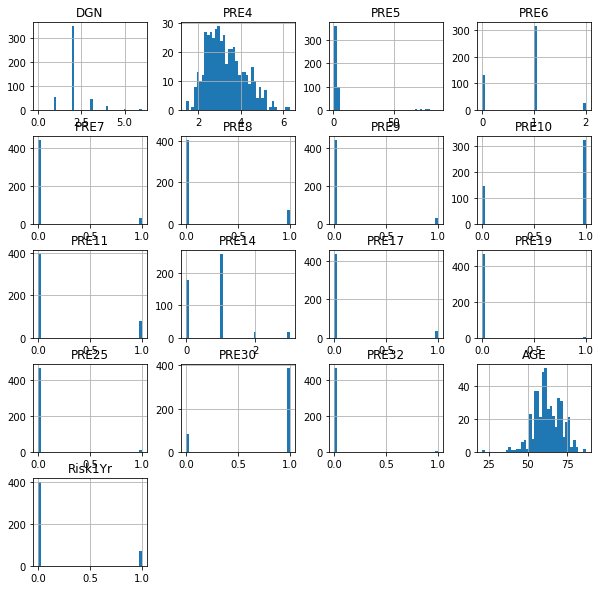

In [9]:
coded_df.hist(figsize=(10, 10), bins=40)

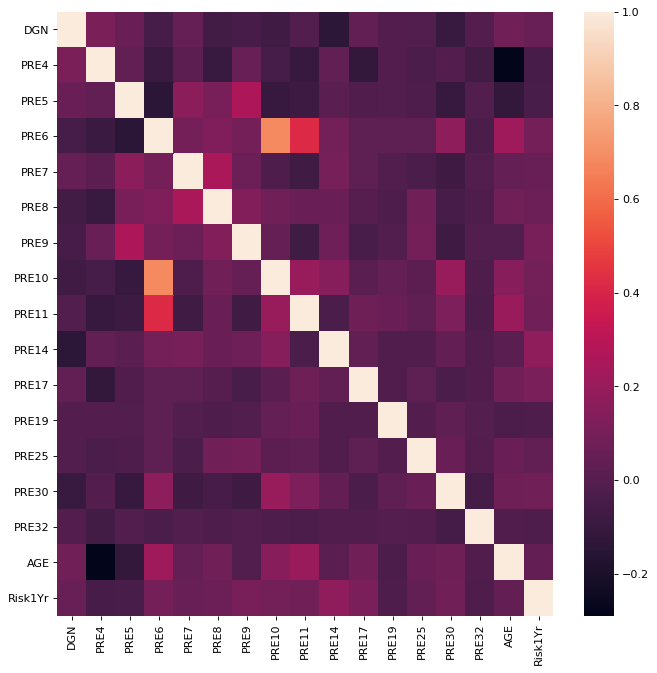

In [10]:
import seaborn as sns 
plt.figure(figsize=(10,10), dpi=80)
heatmap = sns.heatmap(coded_df.corr(), annot=False)

In [11]:
del coded_df['Risk1Yr']

При обучении модели некоторые столбцы за счет неравномерного распределения могут создавать ложную корреляцию и снижают точность выборки. Это столбцы использоваться в обучении не будут.
$$$$Учитывая, что в обычной жизни данные все таки не аугментированные, мне кажется  и акцент при проверке стоит делать именно на них :-) 
 

In [12]:
X_real = coded_df[['AGE', 'PRE4', 'PRE5', 'PRE6', 'DGN', 'PRE14', 'PRE8', 'PRE7', 'PRE19', 'PRE25', 'PRE17']]
X = np.array(coded_df)

In [13]:
from sklearn.preprocessing import StandardScaler

scaler_1 = StandardScaler().fit(X_real)
X2= scaler_1.transform(X_real)

In [14]:
from imblearn.over_sampling import ADASYN

X_2, y_2 = ADASYN(sampling_strategy=1, n_neighbors=5,  random_state=0).fit_resample(np.array(X2), np.array(y))

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [15]:
from sklearn.model_selection import train_test_split

X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(X_2, y_2, test_size = 0.15, random_state = 0)
#пожалуй, проверять стоит на тех реальных данных, с которыми модель не знакома
X_train_model2, X_test_model2, y_train_model2, y_test_model2 = train_test_split(X2, y, test_size = 0.15, random_state = 0)


In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score


In [17]:
#поиск оптимальных гипперпараметров 
knn_real = KNeighborsClassifier(weights = 'distance')
grid = {'n_neighbors': np.array(np.linspace(1, 50, 100), dtype='int')}
gs = GridSearchCV(knn_real, grid, cv=2 )
gs.fit(X_train_aug, y_train_aug)
param = gs.best_params_

#модель
knn_real = KNeighborsClassifier(n_neighbors=param['n_neighbors'])
knn_real.fit(X_train_aug, y_train_aug)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [18]:
print('Тест модели на аугментированных данных \n', metrics.classification_report(y_test_aug, knn_real.predict(X_test_aug)))
print('AUC ROC тест для knn_real:', roc_auc_score(y_test_aug, knn_real.predict(X_test_aug)))

Тест модели на аугментированных данных 
               precision    recall  f1-score   support

           0       0.93      0.84      0.88        63
           1       0.84      0.93      0.88        57

    accuracy                           0.88       120
   macro avg       0.89      0.89      0.88       120
weighted avg       0.89      0.88      0.88       120

AUC ROC тест для knn_real: 0.885547201336675


In [19]:
print(y_test_model2)
print(knn_real.predict(X_test_model2))

[0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1]
[0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1]


In [20]:

print('Тест модели на реальных данных \n', metrics.classification_report(y_test_model2, knn_real.predict(X_test_model2)))
print('AUC ROC тест для knn_real:', roc_auc_score(y_test_model2, knn_real.predict(X_test_model2)))

Тест модели на реальных данных 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        57
           1       1.00      1.00      1.00        14

    accuracy                           1.00        71
   macro avg       1.00      1.00      1.00        71
weighted avg       1.00      1.00      1.00        71

AUC ROC тест для knn_real: 1.0


In [21]:
#и на полной выборке
print('Тест модели на реальных данных \n', metrics.classification_report(y, knn_real.predict(X2)))
print('AUC ROC тест для knn_real:', roc_auc_score(y, knn_real.predict(X2)))

Тест модели на реальных данных 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       400
           1       0.87      0.97      0.92        70

    accuracy                           0.97       470
   macro avg       0.93      0.97      0.95       470
weighted avg       0.98      0.97      0.98       470

AUC ROC тест для knn_real: 0.9732142857142857


In [22]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
grid = {"C": np.arange(0, 3, 0.1),
              "penalty":["l1","l2"],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

log = LogisticRegression()

gs = GridSearchCV(log, grid, cv=5,)
gs.fit(X_train_aug, y_train_aug)
log_param= gs.best_params_
alg = LogisticRegression(C=log_param['C'], penalty=log_param['penalty'],
                         solver=log_param['solver'])
alg.fit(X_train_aug, y_train_aug)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
print('Тест модели на аугментированных данных \n', metrics.classification_report(y_test_aug, alg.predict(X_test_aug)))
print('AUC ROC тест для логистической регрессии:', roc_auc_score(y_test_aug, alg.predict(X_test_aug)))

Тест модели на аугментированных данных 
               precision    recall  f1-score   support

           0       0.61      0.57      0.59        63
           1       0.56      0.60      0.58        57

    accuracy                           0.58       120
   macro avg       0.58      0.58      0.58       120
weighted avg       0.59      0.58      0.58       120

AUC ROC тест для логистической регрессии: 0.5839598997493733


In [24]:
print('Тест модели на реальных данных \n', metrics.classification_report(y_test_model2, alg.predict(X_test_model2)))
print('AUC ROC тест для логистической регрессии:', roc_auc_score(y_test_model2, alg.predict(X_test_model2)))

Тест модели на реальных данных 
               precision    recall  f1-score   support

           0       0.89      0.72      0.80        57
           1       0.36      0.64      0.46        14

    accuracy                           0.70        71
   macro avg       0.63      0.68      0.63        71
weighted avg       0.79      0.70      0.73        71

AUC ROC тест для логистической регрессии: 0.681077694235589


In [25]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
clf = SVC()
hyper_param = {"C": np.arange(0, 3, 0.0001),
               'gamma':  np.arange(0, 3, 0.0001),
               'kernel': ['rbf', 'linear', 'sigmoid'],
               'class_weight':['balanced', None]}
RCV = RandomizedSearchCV(clf, hyper_param, cv=5)

RCV.fit(X_train_aug, y_train_aug)
RCV_param= RCV.best_params_
clf = SVC(C=RCV_param['C'], gamma=RCV_param['gamma'],
          kernel=RCV_param['kernel'], 
          class_weight=RCV_param['class_weight'])

clf.fit(X_train_aug, y_train_aug)
RCV_param

{'C': 2.1991, 'class_weight': 'balanced', 'gamma': 2.033, 'kernel': 'rbf'}

In [26]:
clf.predict(X_test_aug)

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0])

In [27]:
print('Тест модели на аугментированных данных \n', metrics.classification_report(y_test_aug, clf.predict(X_test_aug)))
print('AUC ROC тест для логистической регрессии:', roc_auc_score(y_test_aug, clf.predict(X_test_aug)))

Тест модели на аугментированных данных 
               precision    recall  f1-score   support

           0       0.88      0.89      0.88        63
           1       0.88      0.86      0.87        57

    accuracy                           0.88       120
   macro avg       0.88      0.87      0.87       120
weighted avg       0.88      0.88      0.87       120

AUC ROC тест для логистической регрессии: 0.8742690058479532


In [29]:
print('Тест модели на реальных данных \n', metrics.classification_report(y_test_model2, clf.predict(X_test_model2)))
print('AUC ROC тест для логистической регрессии:', roc_auc_score(y_test_model2, clf.predict(X_test_model2)))

Тест модели на реальных данных 
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        57
           1       0.81      0.93      0.87        14

    accuracy                           0.94        71
   macro avg       0.90      0.94      0.92        71
weighted avg       0.95      0.94      0.95        71

AUC ROC тест для логистической регрессии: 0.9379699248120301
